In [538]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
df_Ins = pd.read_csv('inspections.csv')

In [201]:
df_Vio = pd.read_csv('violations.csv')

In [202]:
df = df_Ins.merge(df_Vio, left_on='serial_number', right_on='serial_number', how='left')

In [203]:
df.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,program_status,record_id,score,serial_number,service_code,service_description,points,violation_code,violation_description,violation_status
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,1.0,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE
1,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,1.0,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE
2,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION,1.0,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE
3,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION,1.0,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
4,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION,1.0,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE


In [204]:
df['activity_date'] = pd.to_datetime(df['activity_date'])

In [205]:
df['year'] = df['activity_date'].dt.year

In [206]:
df['month'] = df['activity_date'].dt.month

In [190]:
#df["time"] = df["year"].map(str) + '-' + df["month"].map(str)

In [207]:
df["time"] = df['activity_date'].apply(lambda x:x.strftime('%Y%m'))

In [196]:
df.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,serial_number,service_code,service_description,points,violation_code,violation_description,violation_status,year,month,time
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,DAHDRUQZO,1,ROUTINE INSPECTION,1.0,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,2017,5,201705
1,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,DAHDRUQZO,1,ROUTINE INSPECTION,1.0,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,2017,5,201705
2,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,DAL3SBUE0,1,ROUTINE INSPECTION,1.0,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,2017,4,201704
3,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,DAL3SBUE0,1,ROUTINE INSPECTION,1.0,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,2017,4,201704
4,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,DAL3SBUE0,1,ROUTINE INSPECTION,1.0,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,2017,4,201704


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901846 entries, 0 to 901845
Data columns (total 27 columns):
activity_date            901846 non-null datetime64[ns]
employee_id              901846 non-null object
facility_address         901846 non-null object
facility_city            901846 non-null object
facility_id              901846 non-null object
facility_name            901846 non-null object
facility_state           901846 non-null object
facility_zip             901846 non-null object
grade                    901846 non-null object
owner_id                 901846 non-null object
owner_name               901846 non-null object
pe_description           901846 non-null object
program_element_pe       901846 non-null int64
program_name             899835 non-null object
program_status           901846 non-null object
record_id                901846 non-null object
score                    901846 non-null int64
serial_number            901846 non-null object
service_code       

In [212]:
df2 = df[['facility_address','facility_city','grade','score','serial_number','points','violation_description',
          'violation_status','time', 'activity_date', 'month']]
df2['points'].fillna(0, inplace = True)
df2['violation_description'].fillna('No violation', inplace = True)
df2['violation_status'].fillna('No violation', inplace = True)

df2.sample(6)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,facility_address,facility_city,grade,score,serial_number,points,violation_description,violation_status,time,activity_date,month
489321,114 W BONITA AVE,SAN DIMAS,A,93,DAJ5Q9FRS,1.0,# 43. Premises; personal/cleaning items; vermi...,OUT OF COMPLIANCE,201602,2016-02-24,2
501190,21190 GOLDEN SPRINGS DR,DIAMOND BAR,A,90,DAKH9DXMG,1.0,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,201602,2016-02-11,2
732479,18620 S WESTERN AVE,GARDENA,A,96,DAOQY0BN7,2.0,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE,201606,2016-06-08,6
117297,1401 N MAIN ST,LOS ANGELES,A,94,DAY5RJXG0,1.0,# 43. Premises; personal/cleaning items; vermi...,OUT OF COMPLIANCE,201703,2017-03-14,3
312812,1847 N CAHUENGA BLVD,LOS ANGELES,B,82,DAAIDCFIW,1.0,# 27. Food separated and protected,OUT OF COMPLIANCE,201609,2016-09-14,9
384802,9620 AIRPORT BLVD,LOS ANGELES,A,92,DAVODQOU8,1.0,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,201701,2017-01-17,1


In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901846 entries, 0 to 901845
Data columns (total 10 columns):
facility_address         901846 non-null object
facility_city            901846 non-null object
grade                    901846 non-null object
score                    901846 non-null int64
serial_number            901846 non-null object
points                   901846 non-null float64
violation_description    901846 non-null object
violation_status         901846 non-null object
time                     901846 non-null object
activity_date            901846 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 75.7+ MB


In [ ]:
df3[['score_scaled', 'facility_city']].set_index('facility_city').plot()

In [141]:
ax = sns.heatmap(df3[['score_scaled', 'facility_city']])


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [144]:
df4 = df2.groupby(['facility_address', 'serial_number', 'time']).agg({
    'score':'mean',
    'points' : 'mean'
})

df4.head()

score    points
facility_address      serial_number time                   
0 ANGELES CREST HWY P DAGXSRD75     2016-5     95  1.000000
                      DARP2Z0WI     2017-5     88  1.333333
0 GREEN PLEASURE PIER DA5UCHFW7     2017-4     92  1.142857
                      DA6ALGW8G     2017-8     84  1.454545
                      DAHAPM6JO     2016-9     92  1.142857

In [ ]:
df[['average_monthly_high','activity_date']].set_index('activity_date').plot(marker='o')

In [408]:
df2.head()

,facility_address,facility_city,grade,score,serial_number,points,violation_description,violation_status,time,activity_date,month
0,17660 CHATSWORTH ST,GRANADA HILLS,A,98,DAHDRUQZO,1.0,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,201705,2017-05-09,5
1,17660 CHATSWORTH ST,GRANADA HILLS,A,98,DAHDRUQZO,1.0,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,201705,2017-05-09,5
2,3615 PACIFIC COAST HWY,TORRANCE,A,94,DAL3SBUE0,1.0,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,201704,2017-04-10,4
3,3615 PACIFIC COAST HWY,TORRANCE,A,94,DAL3SBUE0,1.0,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,201704,2017-04-10,4
4,3615 PACIFIC COAST HWY,TORRANCE,A,94,DAL3SBUE0,1.0,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,201704,2017-04-10,4


In [448]:
ResName = df2[(df2.time=='201507') & (df2.score < 75)].facility_address.unique().tolist()
ResName

['3109 N GAREY AVE',
 '13353 ALONDRA BLVD STE 100',
 '3623 W PICO BLVD',
 '127 N GARFIELD AVE Z',
 '3003 WABASH AVE']

In [451]:
df3 = df2[(df2.facility_address == '3109 N GAREY AVE') | (df2.facility_address == '13353 ALONDRA BLVD STE 100')| 
(df2.facility_address == '3623 W PICO BLVD')| (df2.facility_address == '127 N GARFIELD AVE Z')|
(df2.facility_address == '3003 WABASH AVE')].groupby(['serial_number','facility_address','time']).agg({
    'points':'mean',
    'score':'mean'
}).reset_index(level=['facility_address', 'time'])

df3.head()

,facility_address,time,points,score
serial_number,,,,
DA0592962,13353 ALONDRA BLVD STE 100,201606,1.666667,90
DA2ZAR0RL,3003 WABASH AVE,201507,1.733333,74
DA3NWSAAE,13353 ALONDRA BLVD STE 100,201507,1.687500,73
DA5P3FQIV,3003 WABASH AVE,201604,1.333333,92
DA5QOBYSH,3623 W PICO BLVD,201611,2.125000,83


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


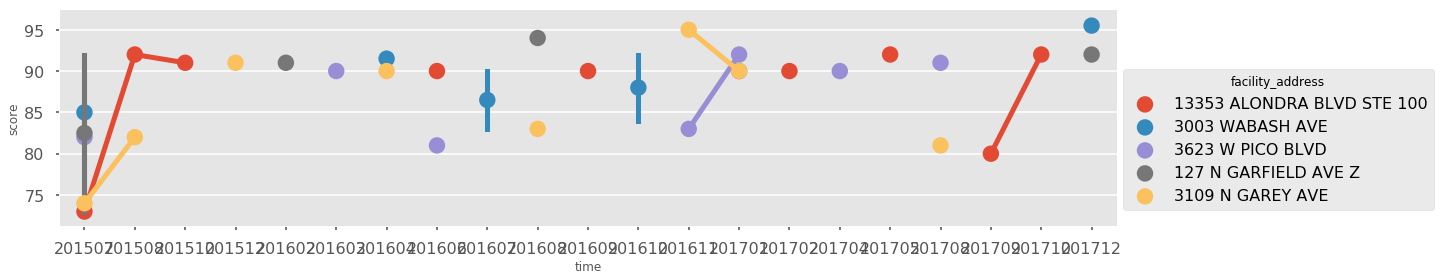

In [500]:
sns.factorplot(x = 'time', y = 'score', data = df3, hue = 'facility_address', aspect = 4, kind = 'point')
plt.rcParams['figure.figsize'] = (16,8);

**What are the most common health code violations?**

In [490]:
df4 = df2.groupby(['violation_description']).agg({
    'points':'mean',
    'facility_address':'count'
})

df4['Losing_Points'] = df4.points * df4.facility_address

df4.columns = ['Avg_points', 'Count', 'Losing_Points']
df4 = df4[(df4.Avg_points > 0) & (df4.Losing_Points.nlargest(10))].reset_index().dropna()
df4

,violation_description,Avg_points,Count,Losing_Points
0,# 06. Adequate handwashing facilities supplied...,2.000000,33783,67566.0
1,# 07. Proper hot and cold holding temperatures,2.982532,40416,120542.0
2,# 14. Food contact surfaces: clean and sanitized,2.716224,34196,92884.0
3,"# 23. No rodents, insects, birds, or animals",2.401838,29273,70309.0
4,# 33. Nonfood-contact surfaces clean and in go...,1.000000,99451,99451.0
5,# 35. Equipment/Utensils - approved; installed...,1.000000,79043,79043.0
6,"# 36. Equipment, utensils and linens: storage ...",1.000000,49464,49464.0
7,# 37. Adequate ventilation and lighting; desig...,1.000000,47723,47723.0
8,"# 40. Plumbing: Plumbing in good repair, prope...",1.000000,50491,50491.0
9,"# 44. Floors, walls and ceilings: properly bui...",1.000000,101243,101243.0


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


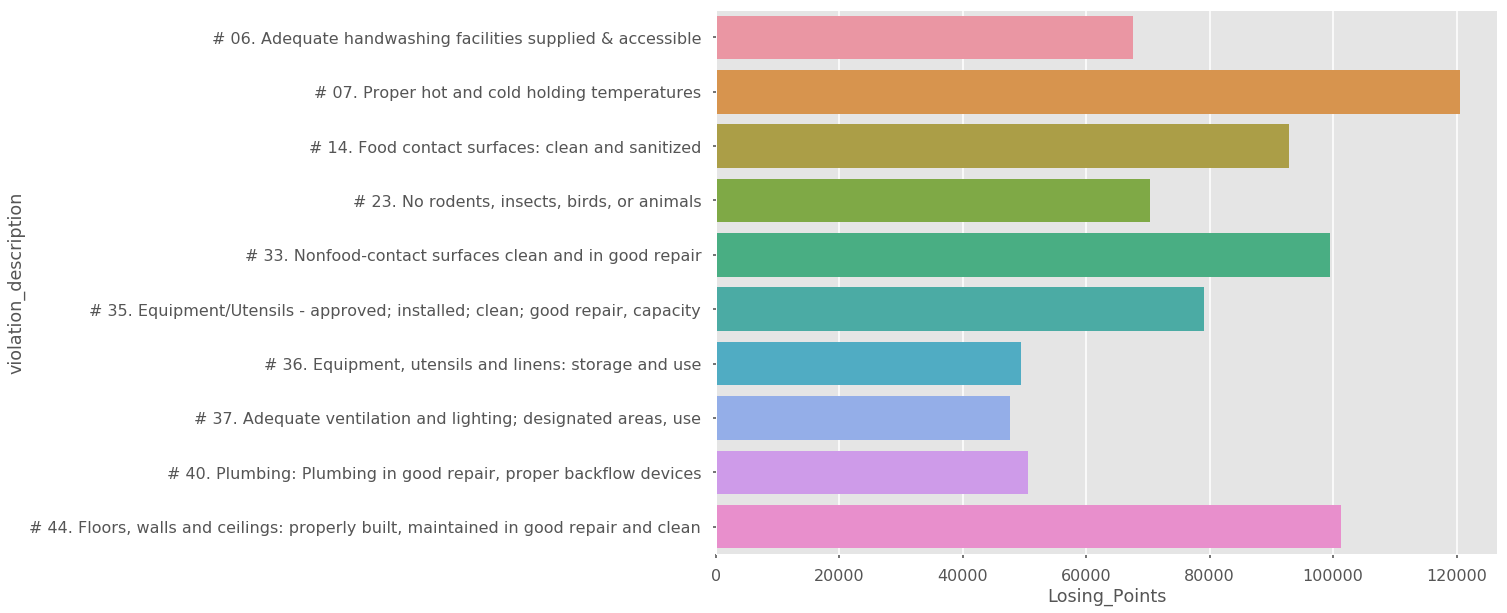

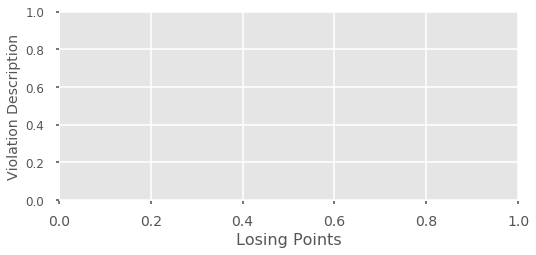

In [543]:
f, ax = plt.subplots(figsize=(14, 10))
sns.factorplot(x = 'Losing_Points' , y = 'violation_description' , data = df4, kind = 'bar', aspect = 2, ax = ax)
plt.xlabel('Losing Points',fontsize=16)
plt.rcParams['figure.figsize'] = (16,8)
plt.ylabel('Violation Description', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show();

**What is the trend of health code violations over time?**

In [368]:
df5 = df2.groupby(['time']).agg({
    'score':'mean',
    'points' : 'mean'
}).dropna().sort_index().reset_index()

df5['score_scaled'] = (df5.score - df5.score.min()) /(df5.score.max() - df5.score.min())
df5['mean'] = df5.score.mean()
df5

,time,score,points,score_scaled,mean
0,201507,91.672236,1.352098,0.332266,91.93938
1,201508,91.638657,1.347304,0.306213,91.93938
2,201509,91.411911,1.352729,0.130292,91.93938
3,201510,91.443298,1.340911,0.154644,91.93938
4,201511,91.789121,1.302578,0.422951,91.93938
5,201512,92.103187,1.299002,0.666621,91.93938
6,201601,92.317017,1.288328,0.832522,91.93938
7,201602,92.392154,1.287569,0.890817,91.93938
8,201603,91.937258,1.302267,0.537884,91.93938
9,201604,92.037101,1.323433,0.615348,91.93938


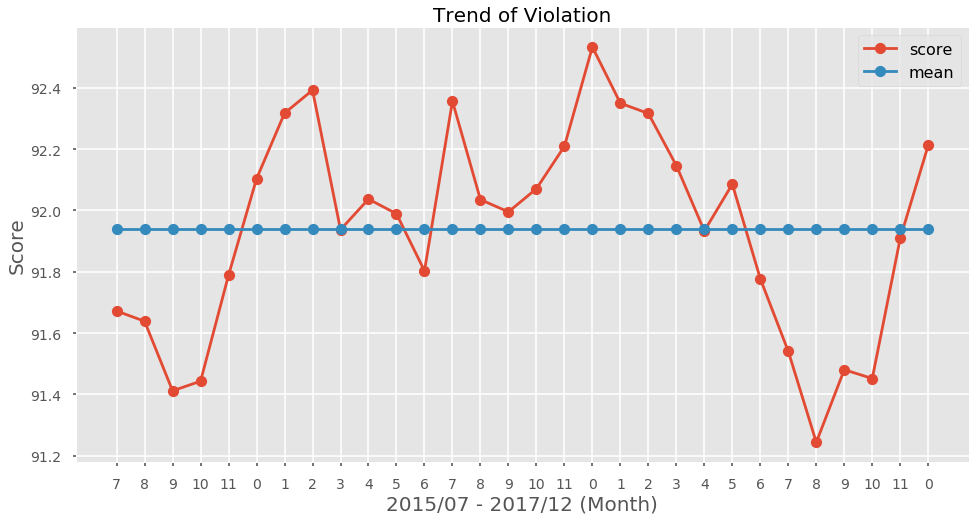

In [472]:
plt.style.use('ggplot')
plt.figuresize = 2
df5[['score', 'mean']].plot(marker='o').hist
plt.title('Trend of Violation',fontsize=20)
plt.xlabel('2015/07 - 2017/12 (Month)',fontsize=20)
plt.rcParams['figure.figsize'] = (16,8)
plt.ylabel('Score', fontsize=20)
plt.xticks(df5.index, ((df5.index + 7)%12), fontsize=14)
plt.yticks(fontsize=14);

**Is there a geographic pattern to health code violations?**

In [290]:
df2.head()

,facility_address,facility_city,grade,score,serial_number,points,violation_description,violation_status,time,activity_date,month
0,17660 CHATSWORTH ST,GRANADA HILLS,A,98,DAHDRUQZO,1.0,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,201705,2017-05-09,5
1,17660 CHATSWORTH ST,GRANADA HILLS,A,98,DAHDRUQZO,1.0,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,201705,2017-05-09,5
2,3615 PACIFIC COAST HWY,TORRANCE,A,94,DAL3SBUE0,1.0,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,201704,2017-04-10,4
3,3615 PACIFIC COAST HWY,TORRANCE,A,94,DAL3SBUE0,1.0,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,201704,2017-04-10,4
4,3615 PACIFIC COAST HWY,TORRANCE,A,94,DAL3SBUE0,1.0,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,201704,2017-04-10,4


In [399]:
df2.points.unique()

array([ 1.,  2.,  4.,  0., 11.,  3.])

In [405]:
df6 = df2.groupby(['facility_city', 'violation_description']).agg({
    'score': 'mean',
    'points' : 'mean',
    'facility_address': 'count'
}).reset_index(level=['facility_city', 'violation_description'])


df6['score_scaled'] = (df6.score - df6.score.min()) / (df6.score.max() - df6.score.min())
df6.columns = ['City','Violation_Description','Avg_Scores', 'Avg_point', 'Count','Score_scaled']

df6.head()

,City,Violation_Description,Avg_Scores,Avg_point,Count,Score_scaled
0,ACTON,# 01a. Demonstration of knowledge,91.714286,2.0,7,0.807309
1,ACTON,# 01b. Food safety certification,91.400000,2.0,10,0.800000
2,ACTON,# 06. Adequate handwashing facilities supplied...,91.533333,2.0,15,0.803101
3,ACTON,# 07. Proper hot and cold holding temperatures,91.928571,3.0,14,0.812292
4,ACTON,# 08. Time as a public health control; procedu...,90.000000,2.0,1,0.767442


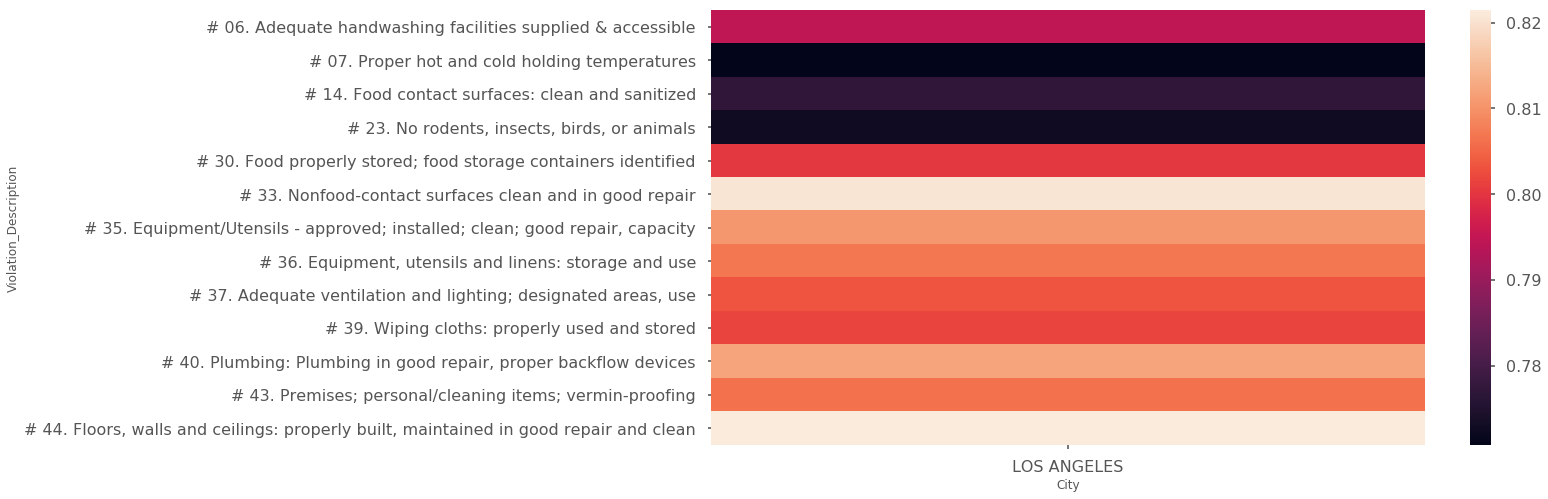

In [407]:
test = df6.loc[df6.Count > 8000, ['City','Violation_Description','Score_scaled']]
test.pivot(index='City', columns='Violation_Description', values='Score_scaled')
sns.heatmap(test.pivot(index='Violation_Description', columns='City', values='Score_scaled'))